In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
from label import label
df = label('../binance-BTCUSDT-1m.csv', t=15)

In [3]:
df.index = pd.to_datetime(df['Time_UTC_Start'])

In [4]:
df.head()

,Open,High,Low,Close,Volumn,Timestamp End,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Time_UTC_Start,label
Time_UTC_Start,,,,,,,,,,,,
2018-07-18 10:39:00,7370.00,7404.23,7365.10,7402.13,421.446875,1531911239999,3.112218e+06,2210,244.531743,1.805624e+06,2018-07-18 10:39:00,1.0
2018-07-18 10:54:00,7404.23,7419.09,7393.03,7398.00,400.220193,1531912139999,2.963666e+06,2825,217.698269,1.612081e+06,2018-07-18 10:54:00,0.0
2018-07-18 11:09:00,7397.00,7413.67,7388.97,7401.99,283.424582,1531913039999,2.097944e+06,2022,158.367674,1.172256e+06,2018-07-18 11:09:00,1.0
2018-07-18 11:24:00,7401.99,7433.32,7395.00,7430.33,385.377189,1531913939999,2.858399e+06,2194,230.656692,1.711215e+06,2018-07-18 11:24:00,1.0
2018-07-18 11:39:00,7430.33,7433.58,7408.07,7418.00,412.557017,1531914839999,3.061536e+06,2352,231.403556,1.717226e+06,2018-07-18 11:39:00,0.0


In [5]:
df1 = df.asfreq('3D')

In [11]:
df1 = df1.fillna(method = "ffill")

In [12]:
decomp = seasonal_decompose(x=df1.Close, model='additive')

In [13]:
est_trend = decomp.trend
est_seasonal = decomp.seasonal
est_residual = decomp.resid

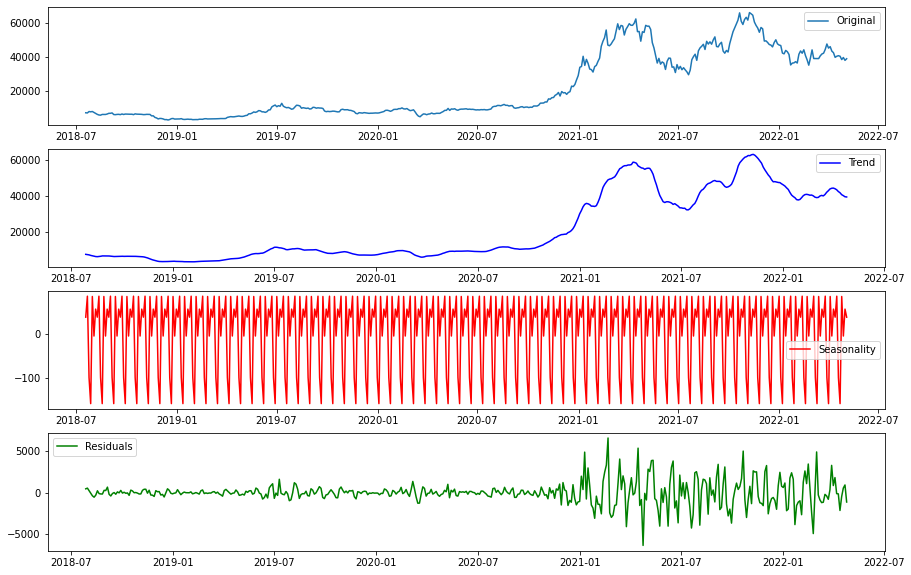

In [14]:
fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0].plot(df1.Close, label='Original')
axes[0].legend()
axes[1].plot(est_trend, label='Trend',color="b")
axes[1].legend()
axes[2].plot(est_seasonal, label='Seasonality',color='r')
axes[2].legend()
axes[3].plot(est_residual, label='Residuals',color='g')
axes[3].legend()

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  4.,  2.,  2.,  0.,  1.,
         3.,  6.,  2.,  7.,  3., 10., 12., 13., 20., 28., 67., 99., 66.,
        31., 14., 11., 11.,  5.,  6.,  3.,  2.,  9.,  1.,  3.,  5.,  0.,
         3.,  1.,  0.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([-6389.73046696, -6129.71335268, -5869.69623839, -5609.6791241 ,
        -5349.66200982, -5089.64489553, -4829.62778125, -4569.61066696,
        -4309.59355268, -4049.57643839, -3789.5593241 , -3529.54220982,
        -3269.52509553, -3009.50798125, -2749.49086696, -2489.47375268,
        -2229.45663839, -1969.4395241 , -1709.42240982, -1449.40529553,
        -1189.38818125,  -929.37106696,  -669.35395268,  -409.33683839,
         -149.3197241 ,   110.69739018,   370.71450447,   630.73161875,
          890.74873304,  1150.76584732,  1410.78296161,  1670.8000759 ,
         1930.81719018,  2190.83430447,  2450.85141875,  2710.86853304,
         2970.88564732,  3230.90276161,  3490.9198759 ,  3750.936990

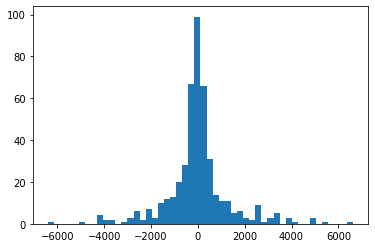

In [27]:
plt.hist(decomp.resid, bins = 50)

In [15]:
df2 = df.asfreq('7D')
df2 = df2.fillna(method = "ffill")
decomp2 = seasonal_decompose(x=df2.Close, model='additive')
est_trend = decomp2.trend
est_seasonal = decomp2.seasonal
est_residual = decomp2.resid

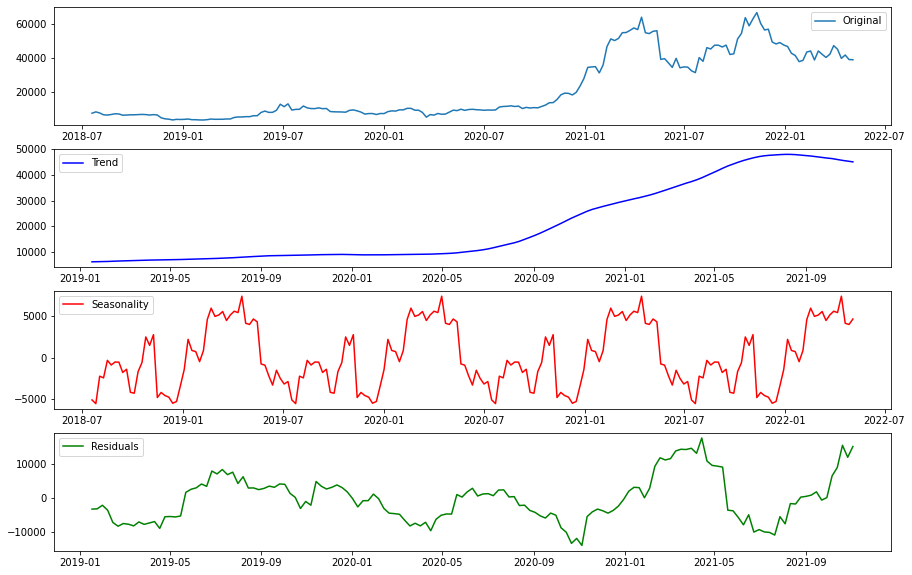

In [16]:
fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0].plot(df2.Close, label='Original')
axes[0].legend()
axes[1].plot(est_trend, label='Trend',color="b")
axes[1].legend()
axes[2].plot(est_seasonal, label='Seasonality',color='r')
axes[2].legend()
axes[3].plot(est_residual, label='Residuals',color='g')
axes[3].legend()

In [17]:
test = est_trend + est_seasonal + est_residual

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 3589.7099999999996,
 3568.43,
 3437.18,
 3405.8299999999995,
 3621.0300000000007,
 3966.5999999999985,
 3820.959999999999,
 3852.25,
 3846.4799999999996,
 4007.8500000000004,
 4017.199999999999,
 4908.46,
 5196.950000000001,
 5192.16,
 5388.969999999999,
 5351.990000000001,
 5929.99,
 5929.99,
 7862.439999999999,
 8683.22,
 7882.57,
 7954.64,
 9124.59,
 12724.12,
 11263.88,
 12933.83,
 9282.08,
 9664.77,
 9750.98,
 11661.48,
 10562.28,
 10156.26,
 10128.03,
 10567.73,
 10085.39,
 10186.72,
 8407.12,
 8236.4,
 8215.82,
 8141.53,
 8006.5599999999995,
 9099.05,
 9357.16,
 8804.62,
 8067.69,
 6892.07,
 7208.02,
 7217.13,
 6655.0,
 7237.34,
 7200.89,
 8349.42,
 8796.97,
 8673.79,
 9399.56,
 9386.88,
 10291.439999999999,
 10291.44,
 9181.93,
 9181.93,
 7837.5599999999995,
 5085.990000000002,
 6583.999999999999,
 6295.759999999998,
 7251.

In [49]:
df3 = df.asfreq('3600s')
df3 = df3.fillna(method = "ffill")
decomp2 = seasonal_decompose(x=df3.Close, model='additive', two_sided=False)
est_trend = decomp2.trend
est_seasonal = decomp2.seasonal
est_residual = decomp2.resid

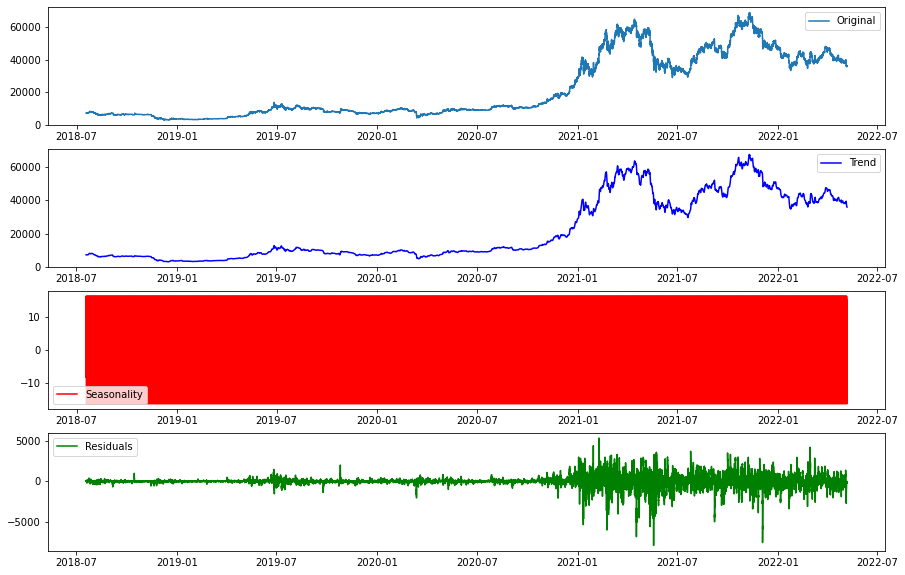

In [50]:
fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0].plot(df3.Close, label='Original')
axes[0].legend()
axes[1].plot(est_trend, label='Trend',color="b")
axes[1].legend()
axes[2].plot(est_seasonal, label='Seasonality',color='r')
axes[2].legend()
axes[3].plot(est_residual, label='Residuals',color='g')
axes[3].legend()

(array([1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 4.0000e+00, 2.0000e+00, 2.0000e+00,
        5.0000e+00, 5.0000e+00, 5.0000e+00, 8.0000e+00, 1.6000e+01,
        1.1000e+01, 1.8000e+01, 2.7000e+01, 3.9000e+01, 5.0000e+01,
        7.4000e+01, 1.0300e+02, 1.5700e+02, 2.0800e+02, 2.9800e+02,
        4.8500e+02, 6.7000e+02, 1.0830e+03, 2.4090e+03, 1.5498e+04,
        7.1300e+03, 1.7860e+03, 1.1160e+03, 7.1500e+02, 4.4300e+02,
        3.2000e+02, 2.1400e+02, 1.2800e+02, 8.7000e+01, 8.6000e+01,
        4.9000e+01, 1.6000e+01, 1.0000e+01, 9.0000e+00, 8.0000e+00,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-7939.49922961, -7673.23010117, -7406.96097274, -7140.6918443 ,
        -6874.42271586, -6608.15358743, -6341.88445899, -6075.61533055,
        -5809.34620211, -5543.07707368, -5276.80794524, -5010.5388168 ,
        -4744.26968837, -4478.00055993, -4211.73143149, -3945.46230305,
        -3679.19317462, -3412.

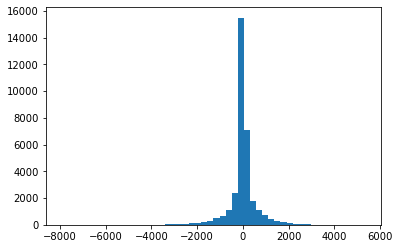

In [51]:
plt.hist(est_residual.dropna(), bins = 50)

In [52]:
est_residual

Time_UTC_Start
2018-07-18 10:39:00           NaN
2018-07-18 11:39:00           NaN
2018-07-18 12:39:00           NaN
2018-07-18 13:39:00           NaN
2018-07-18 14:39:00           NaN
                          ...    
2022-05-07 03:39:00   -175.444066
2022-05-07 04:39:00   -220.661329
2022-05-07 05:39:00   -158.834902
2022-05-07 06:39:00   -200.925333
2022-05-07 07:39:00    -25.401807
Freq: 3600S, Name: resid, Length: 33334, dtype: float64

In [29]:
list(est_trend)[23]

nan

In [61]:
data = (est_seasonal + est_trend).dropna()

In [62]:
data

Time_UTC_Start
2018-07-19 10:39:00     7369.600747
2018-07-19 11:39:00     7365.312224
2018-07-19 12:39:00     7369.067980
2018-07-19 13:39:00     7389.943591
2018-07-19 14:39:00     7377.053406
                           ...     
2022-05-07 03:39:00    36064.844066
2022-05-07 04:39:00    36039.711329
2022-05-07 05:39:00    36017.114902
2022-05-07 06:39:00    35996.475333
2022-05-07 07:39:00    35977.091807
Freq: 3600S, Length: 33310, dtype: float64

In [63]:
data = data - data.shift(1)

In [64]:
old_data = df3.Close - df3.Close.shift(1)

In [65]:
((data[1:] * old_data[1:]) >= 0).sum()/len(data[1:])

0.5251733765648924

In [66]:
data =(data[1:] >= 0) * 1

In [67]:
data = pd.DataFrame(data, columns={'label'})

In [68]:
data.to_csv('./new_label.csv', index=True)

In [69]:
data

,label
Time_UTC_Start,
2018-07-19 11:39:00,0
2018-07-19 12:39:00,1
2018-07-19 13:39:00,1
2018-07-19 14:39:00,0
2018-07-19 15:39:00,0
...,...
2022-05-07 03:39:00,0
2022-05-07 04:39:00,0
2022-05-07 05:39:00,0


In [56]:
est_residual_ = pd.DataFrame(est_residual)

In [58]:
est_residual_.to_csv('./residual.csv', index=True)

In [59]:
est_residual_

,resid
Time_UTC_Start,
2018-07-18 10:39:00,NaN
2018-07-18 11:39:00,NaN
2018-07-18 12:39:00,NaN
2018-07-18 13:39:00,NaN
2018-07-18 14:39:00,NaN
...,...
2022-05-07 03:39:00,-175.444066
2022-05-07 04:39:00,-220.661329
2022-05-07 05:39:00,-158.834902
